# Lab 7: Introducing Regression

Objectives:
- To gain hands-on experience with regression models using an example dataset.
- To better understand the concept of regression through its applications.

In [1]:
# # Run this cell if you use Colab
# from google.colab import drive
# drive.mount('/content/drive')

## Linear Regression

### *Simple* Linear Regression

#### Example #1

The following example is from this [reference](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html).

This type of linear regression deals with **one** independent variable.

This example uses only *the first feature* of the diabetes dataset to illustrate the data points within the two-dimensional plot.


In [2]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

Determine the shape of data.

In [3]:
print('Shape of X: %s'%str(diabetes_X.shape))
print('Shape of y: %s'%str(diabetes_y.shape))

Shape of X: (442, 10)
Shape of y: (442,)


In [4]:
diabetes_X[:10]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02268774, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03198764, -0.04664087],
       [-0.09269548, -0.04464164, -0.04069594, -0.01944183, -0.06899065,
        -0.07928784,  0.04127682, -0.0763945 , -0.04117617, -0.09634616],
       [-0.04547248,  0.05068012, -0.04716281, -0.01599898, -0.04009564,
        -0.02480001,  0.00077881, -0.03949338

In [5]:
diabetes_y[:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

Use only one feature.

In [6]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

Plot all data points.

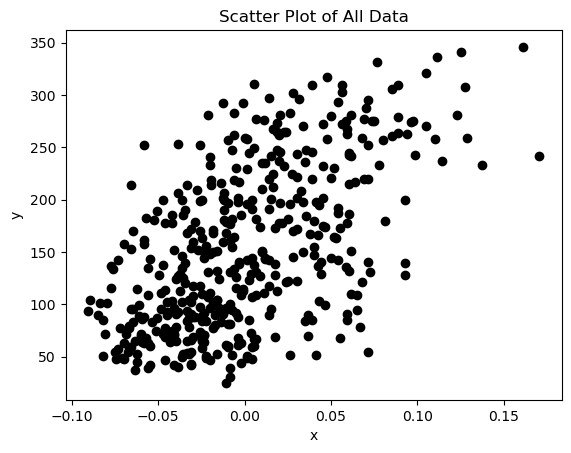

In [7]:
# Plot outputs
plt.scatter(diabetes_X, diabetes_y, color="black")

plt.title("Scatter Plot of All Data")
plt.xticks()
plt.yticks()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Split data into training set and test set.

In [8]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

Create a linear regression model.

In [9]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

Results.

In [10]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


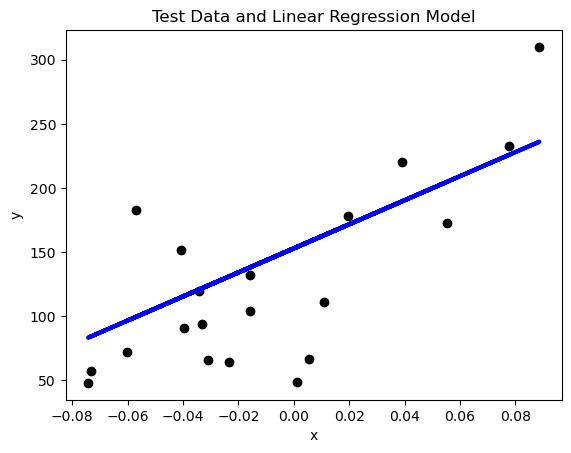

In [11]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.title("Test Data and Linear Regression Model")
plt.xticks()
plt.yticks()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### Example #2

The following example is from this [reference](https://www.w3schools.com/python/python_ml_multiple_regression.asp).

First load the data.

In [12]:
import pandas as pd

# Load the data
df = pd.read_csv('data_MLR.csv')
print(df.shape)
df.head()

(36, 5)


,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


We'll pick only one independent variable and one dependent variable.

Let's first pick ```Volume``` to see how well it could capture variance of the data.
- Independent variable (x) =  Volume
- Dependent variable (y) = CO2

In [13]:
X_2 = df[['Volume']].values.reshape(-1,1)
y_2 = df['CO2'].values

Plot the data.

Text(0.5, 1.0, 'Scatter Plot of All Data')

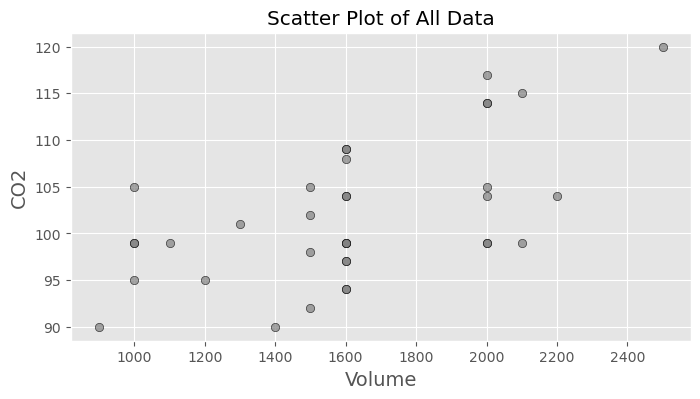

In [14]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(X_2, y_2, edgecolor='k', facecolor='grey', alpha=0.7)
ax.set_ylabel('CO2', fontsize=14)
ax.set_xlabel('Volume', fontsize=14)
ax.set_title('Scatter Plot of All Data')

Create a linear regression model.

In [15]:
regr = linear_model.LinearRegression()
regr.fit(X_2, y_2)
model = regr.predict(X_2)

Plot it out to see how well the model (using ```Volume```) fits the data.

Text(0.5, 1.0, 'Linear Regression Model')

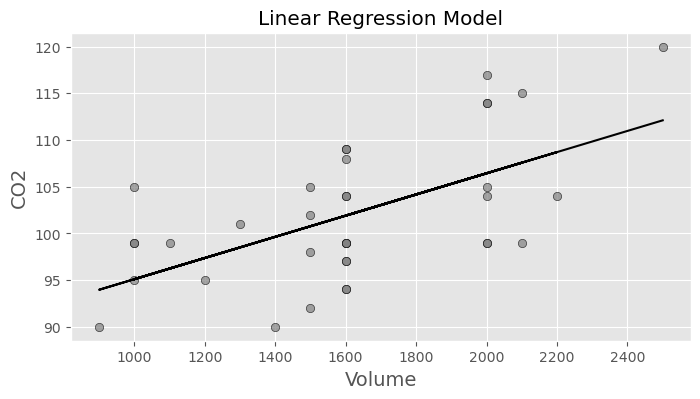

In [16]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X_2, model, color='k', label='Regression model')
ax.scatter(X_2, y_2, edgecolor='k', facecolor='grey', alpha=0.7)
ax.set_ylabel('CO2', fontsize=14)
ax.set_xlabel('Volume', fontsize=14)

ax.set_title('Linear Regression Model')

### Multiple Linear Regression

We'll use the previous dataset.

In [17]:
# reload the data
df = pd.read_csv('data_MLR.csv')
print(df.shape)
df.head()

(36, 5)


,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


Now select *two variables* of interest.

- Independent variables (x) include ```Weight``` and ```Volumne```.

- Dependent variable (y) is ```CO2```.

In [18]:
X_m = df[['Weight', 'Volume']].values.reshape(-1,2)
y_m = df['CO2']

# Prepare model data point for visualization
x = X_m[:, 0]
y = X_m[:, 1]
z = y_m

Print values of each feature to double check the correctness.

In [19]:
print('Values of feature #1: Weight')
print(x)

Values of feature #1: Weight
[ 790 1160  929  865 1140  929 1109 1365 1112 1150  980  990 1112 1252
 1326 1330 1365 1280 1119 1328 1584 1428 1365 1415 1415 1465 1490 1725
 1523 1705 1605 1746 1235 1390 1405 1395]


In [20]:
print('Values of feature #2: Volume')
print(y)

Values of feature #2: Volume
[1000 1200 1000  900 1500 1000 1400 1500 1500 1600 1100 1300 1000 1600
 1600 1600 1600 2200 1600 2000 1600 2000 2100 1600 2000 1500 2000 2000
 1600 2000 2100 2000 1600 1600 1600 2500]


In [21]:
print('Values of feature #3: CO2')
print(z)

Values of feature #3: CO2
0      99
1      95
2      95
3      90
4     105
5     105
6      90
7      92
8      98
9      99
10     99
11    101
12     99
13     94
14     97
15     97
16     99
17    104
18    104
19    105
20     94
21     99
22     99
23     99
24     99
25    102
26    104
27    114
28    109
29    114
30    115
31    117
32    104
33    108
34    109
35    120
Name: CO2, dtype: int64


Let's visualize it in 3D.

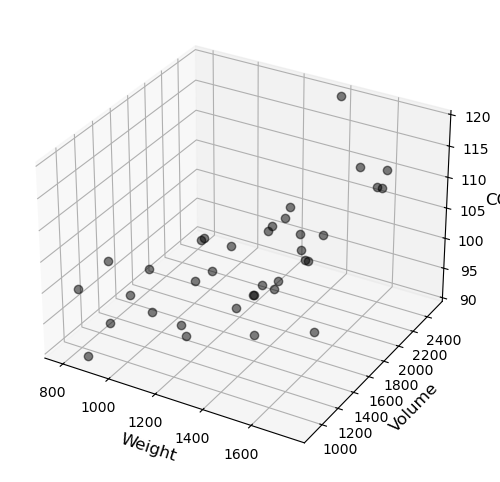

In [22]:
plt.style.use('default')
fig = plt.figure(figsize=(6, 6))


ax = fig.add_subplot(projection='3d')
ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.set_xlabel('Weight', fontsize=12)
ax.set_ylabel('Volume', fontsize=12)
ax.set_zlabel('CO2', fontsize=12)
ax.locator_params(nbins=10, axis='x')


Visualize from different angle.

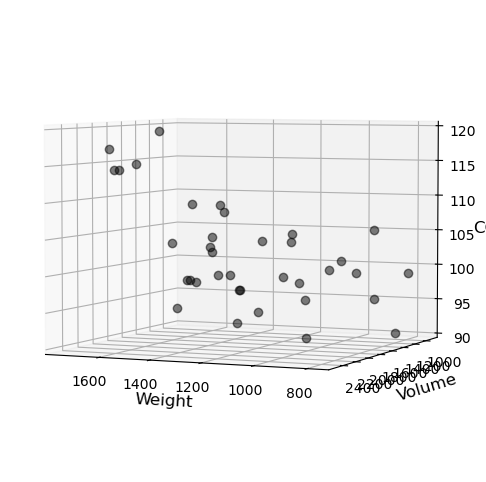

In [23]:
plt.style.use('default')
fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(projection='3d')
ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.set_xlabel('Weight', fontsize=12)
ax.set_ylabel('Volume', fontsize=12)
ax.set_zlabel('CO2', fontsize=12)
ax.locator_params(nbins=10, axis='x')

ax.view_init(elev=4, azim=114)

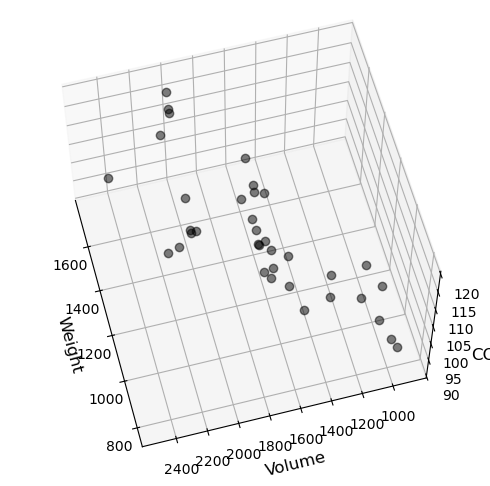

In [24]:
plt.style.use('default')
fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(projection='3d')
ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.set_xlabel('Weight', fontsize=12)
ax.set_ylabel('Volume', fontsize=12)
ax.set_zlabel('CO2', fontsize=12)
ax.locator_params(nbins=10, axis='x')

ax.view_init(elev=60, azim=165)

Create a linear regression model.

In [25]:
regr = linear_model.LinearRegression()
model = regr.fit(X_m, y_m)

Now, let's try predicting value of CO2, given some weight and volume.

In [26]:
predictedCO2 = regr.predict([[3300, 1300]])

print(predictedCO2)
ax.view_init(elev=60, azim=165)

[114.75968007]


## Polynomial Regression


This example is from [reference](https://medium.com/@shuv.sdr/polynomial-regression-in-python-58198fb0973f).

In [27]:
# Load dataset
df_sal = pd.read_csv('Position_Salaries.csv')

# See first 5 rows of the dataset
df_sal.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


Plot Salary and Level to see if there's any relationship among the two features.

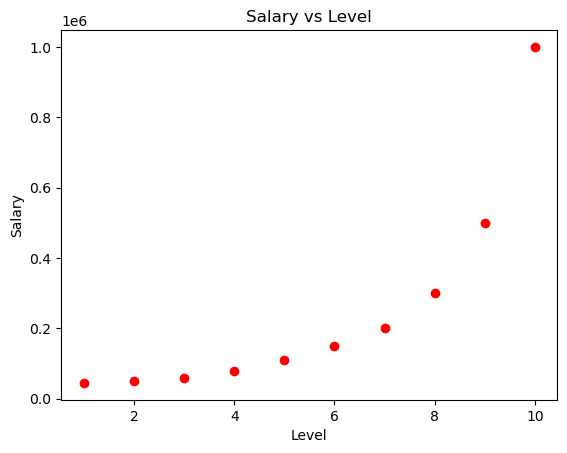

In [28]:
# Relationship between Salary and Level
plt.scatter(df_sal['Level'], df_sal['Salary'], color = 'red')
plt.title('Salary vs Level')
plt.xticks()
plt.yticks()
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

Preparing the data.

In [29]:
# Splitting variables
X = df_sal.iloc[:, 1:-1].values  # independent
y = df_sal.iloc[:, -1].values  # dependent

Train *polynomial regression model* on the whole dataset.

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

pr = PolynomialFeatures(degree = 4)
X_poly = pr.fit_transform(X)
lr_2 = LinearRegression()
lr_2.fit(X_poly, y)


LinearRegression()

Train *linear regression model* on whole dataset

In [31]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

Let's predict the results from both models and compare them.

In [32]:
# Predict results
y_pred_lr = lr.predict(X)           # Linear Regression
y_pred_poly = lr_2.predict(X_poly)  # Polynomial Regression

Output from linear regression model.

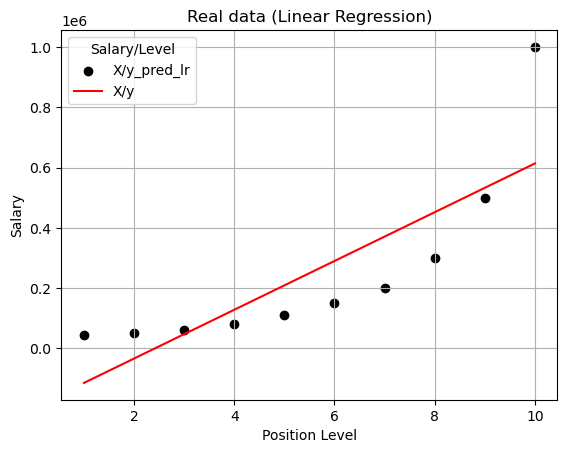

In [33]:
# Visualize real data with linear regression
plt.scatter(X, y, color = 'black')
plt.plot(X, lr.predict(X), color = 'red')
plt.title('Real data (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred_lr', 'X/y'], title = 'Salary/Level', loc='best', facecolor='white')
# plt.box(False)
plt.grid()
plt.show()

Output from polynomial regression model.

/tmp/nix-shell.layFpx/ipykernel_20554/4035391431.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


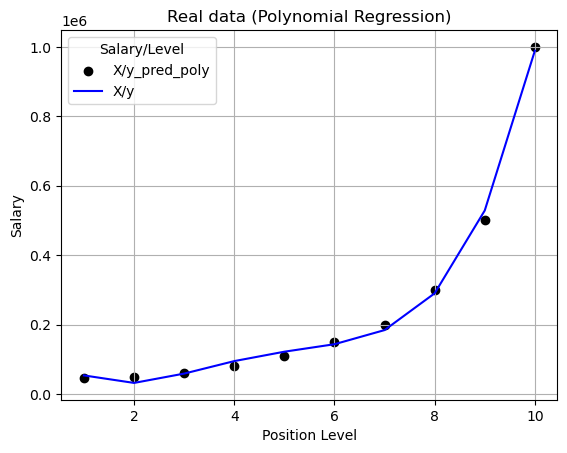

In [34]:
# Visualize real data with polynomial regression
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'black')
plt.plot(X, lr_2.predict(X_poly), color = 'blue')
plt.title('Real data (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred_poly', 'X/y'], title = 'Salary/Level', loc='best', facecolor='white')
# plt.box(False)
plt.grid()
plt.show()
